In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from scipy.special import j0, y0, j1, y1, jv, yn
from scipy.interpolate import interp1d

In [2]:
# define the network
class NN_Fourier(nn.Module):

    def __init__(self, n_input_units=1, n_output_units=1, n_hidden_units=32):
        """Initializer method.
        """
        super(NN_Fourier, self).__init__()
        self.sin_part_lin = nn.Linear(n_input_units, n_hidden_units)
        self.cos_part_lin = nn.Linear(n_input_units, n_hidden_units)
        self.output = nn.Linear(2*n_hidden_units, n_output_units)

    def forward(self, t):
        sin_lin = self.sin_part_lin(t)
        sin = torch.sin(sin_lin)
        cos_lin = self.cos_part_lin(t)
        cos = torch.cos(cos_lin)
        combined = torch.cat((sin, cos), 1)
        output = self.output(combined)
        return output

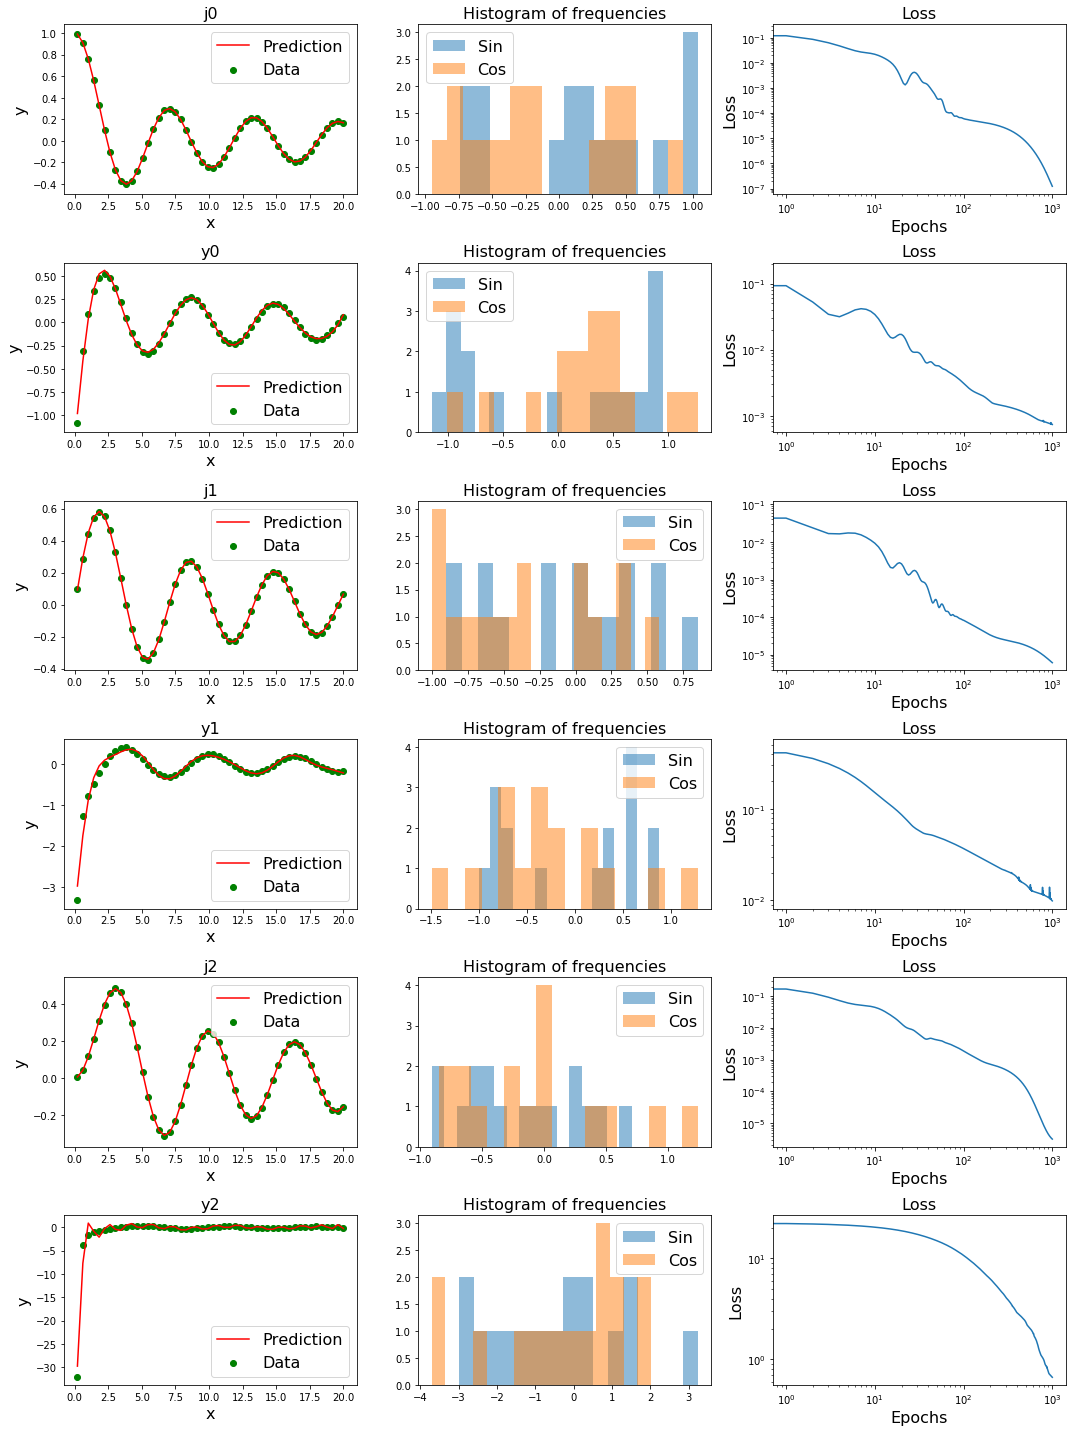

In [3]:
x = torch.unsqueeze(torch.linspace(0.2, 20, 50), dim=1)
bessels = [j0, y0, j1, y1, jv, yn]
labels = ['j0', 'y0', 'j1', 'y1', 'j2', 'y2']
epochs = 1000

fig, ax = plt.subplots(6, 3, figsize=(15,20))

for i, func in enumerate(bessels):
    if i > 3:
        y = func(2,x)
        y = torch.tensor(y.numpy(), dtype = torch.float)
    else:
        y = func(x)
    Fourier_net = NN_Fourier(n_hidden_units=16)
    optimizer = optim.Adam(Fourier_net.parameters(), lr=0.005)
    loss_func = nn.MSELoss()
    losses = []
    
    for t in range(epochs):
        prediction = Fourier_net(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        losses.append(loss.detach().item())
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

    # plot solution
    ax[i,0].set_title('{}'.format(labels[i]),fontsize = 16)
    ax[i,0].set_xlabel('x',fontsize = 16)
    ax[i,0].set_ylabel('y',fontsize = 16)
    ax[i,0].scatter(x.data.numpy(), y.data.numpy(), label = 'Data', c = 'green')
    ax[i,0].plot(x.data.numpy(), prediction.data.numpy(), label = 'Prediction', c = 'red')
    ax[i,0].legend(fontsize = 16)
    
    # plot hist of freqencies
    weights_biases = np.array([p.detach().numpy() for p in Fourier_net.parameters()])
    weights_biases_sin = weights_biases[0][:,0]
    weights_biases_cos = weights_biases[2][:,0]

    ax[i,1].hist(weights_biases_sin, bins = 16, alpha = 0.5, label = 'Sin')
    ax[i,1].hist(weights_biases_cos, bins = 16, alpha = 0.5, label = 'Cos')
    ax[i,1].legend(fontsize = 16)
    ax[i,1].set_title('Histogram of frequencies', fontsize = 16)
    
    # plot loss
    ax[i,2].loglog(range(epochs), losses)
    ax[i,2].set_xlabel('Epochs',fontsize = 16)
    ax[i,2].set_ylabel('Loss',fontsize = 16)
    ax[i,2].set_title('Loss',fontsize = 16)
plt.tight_layout()
plt.savefig('PlotsApril20/BesselFourier.png')

[(16, 1), (16,), (16, 1), (16,), (1, 32), (1,)]


Text(0.5, 1.0, 'Histogram of frequencies')

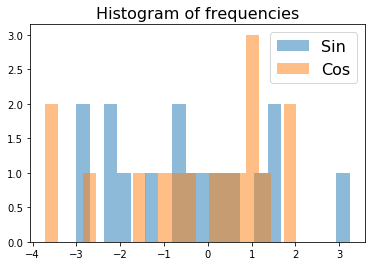

In [4]:
weights_biases = np.array([p.detach().numpy() for p in Fourier_net.parameters()])
print([p.shape for p in weights_biases])
weights_biases_sin = weights_biases[0][:,0]
weights_biases_cos = weights_biases[2][:,0]

plt.figure()
plt.hist(weights_biases_sin, bins = 20, alpha = 0.5, label = 'Sin')
plt.hist(weights_biases_cos, bins = 20, alpha = 0.5, label = 'Cos')
plt.legend(fontsize = 16)
plt.title('Histogram of frequencies', fontsize = 16)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

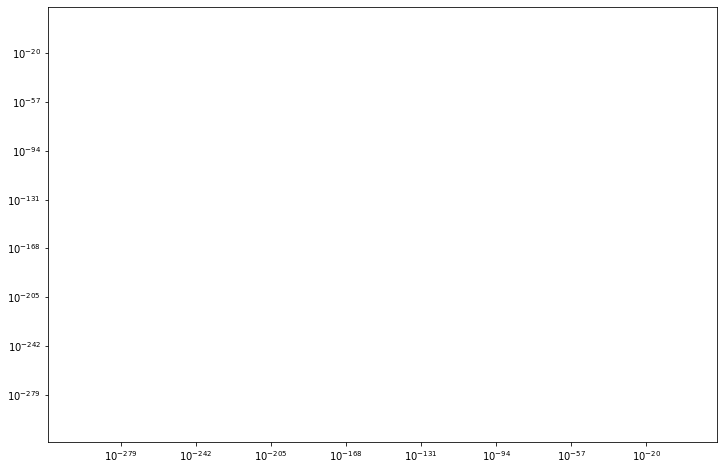

In [5]:
epochs = range(100)
plt.figure(figsize = (12,8))
plt.loglog(epochs, losses)
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.title('Loss within training domain', fontsize = 18)
#plt.savefig('PlotsApril20/Fourier/LossComparison.png')

In [ ]:
np.concatenate((np.array(range(8)), np.array(range(8))))

In [ ]:
n_hidden_units = 8
K = torch.Tensor(np.concatenate(np.array(range(8)), 
                                np.array(range(8))))

In [9]:
# let's try to initialize the weights

class NN_Fourier(nn.Module):

    def __init__(self, n_input_units=1, n_output_units=1, n_hidden_units=32):
        """Initializer method.
        """
        super(NN_Fourier, self).__init__()
        self.sin_part_lin = nn.Linear(n_input_units, n_hidden_units, bias = False)
        self.cos_part_lin = nn.Linear(n_input_units, n_hidden_units, bias = False)
        
#         K = torch.Tensor(np.concatenate((np.array(range(n_hidden_units)), 
#                                         np.array(range(n_hidden_units)))))
        K = torch.Tensor(np.array(range(n_hidden_units)))
        
        K = torch.unsqueeze(K,1)
        self.sin_part_lin.weight.data = self.sin_part_lin.weight.data + K
        self.cos_part_lin.weight.data = self.cos_part_lin.weight.data + K
        self.output = nn.Linear(2*n_hidden_units, n_output_units)

    def forward(self, t):
        sin_lin = self.sin_part_lin(t)
        sin = torch.sin(sin_lin)
        cos_lin = self.cos_part_lin(t)
        cos = torch.cos(cos_lin)
        combined = torch.cat((sin, cos), 1)
        output = self.output(combined)
        return output

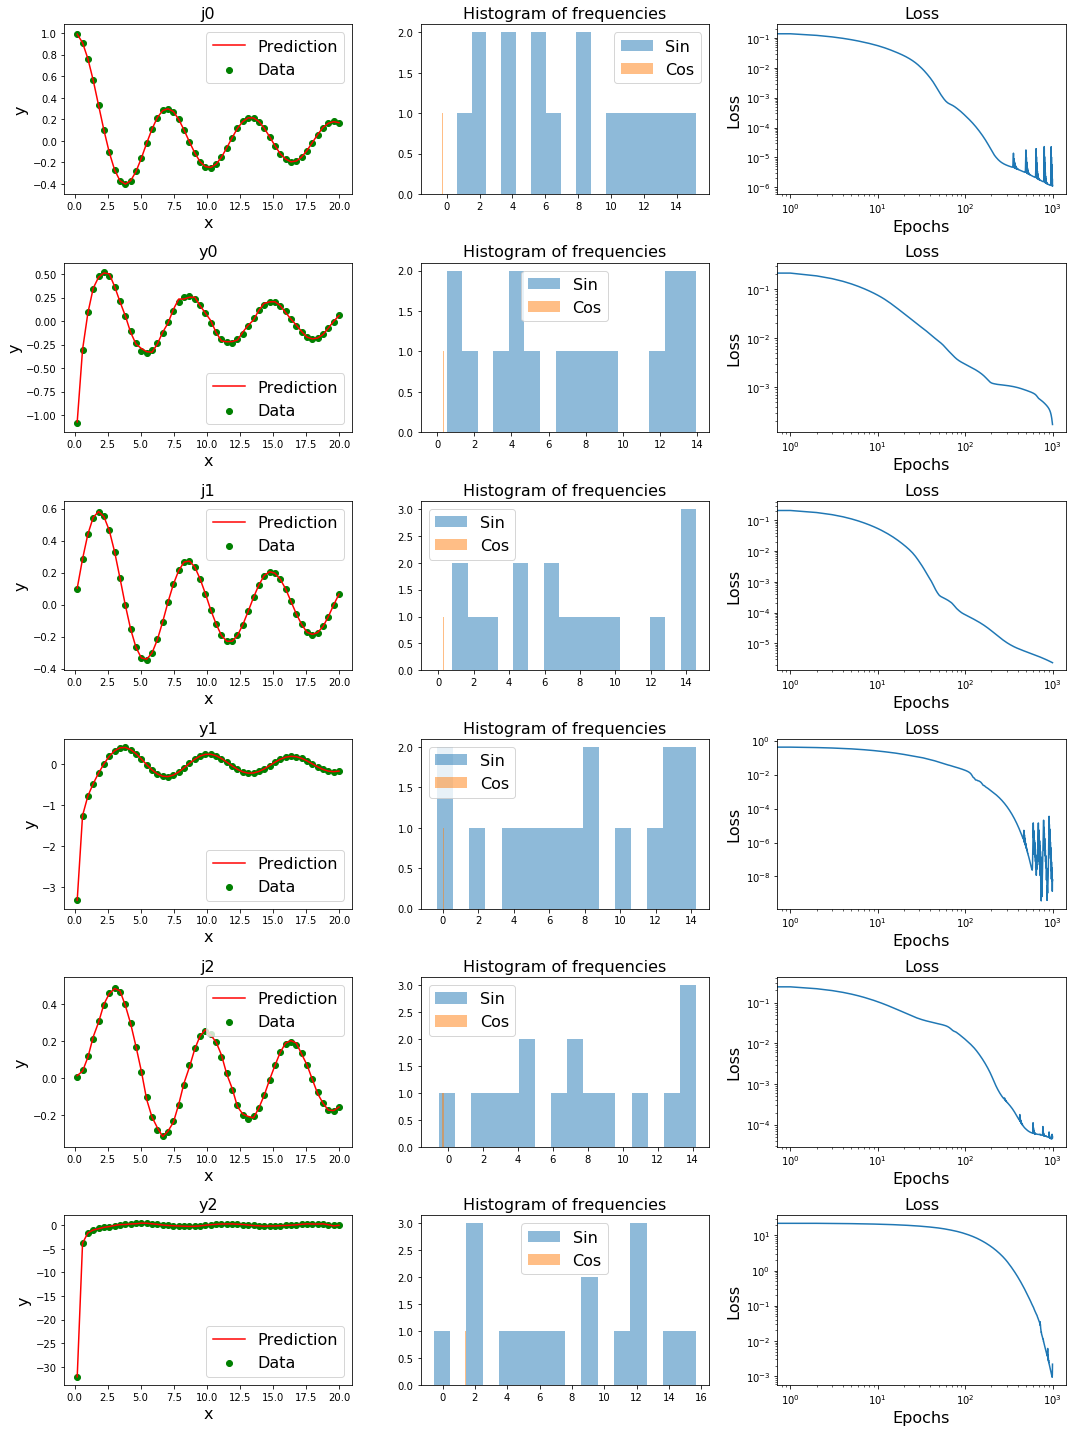

In [24]:

x = torch.unsqueeze(torch.linspace(0.2, 20, 50), dim=1)
bessels = [j0, y0, j1, y1, jv, yn]
labels = ['j0', 'y0', 'j1', 'y1', 'j2', 'y2']
epochs = 1000

fig, ax = plt.subplots(6, 3, figsize=(15,20))

for i, func in enumerate(bessels):
    if i > 3:
        y = func(2,x)
        y = torch.tensor(y.numpy(), dtype = torch.float)
    else:
        y = func(x)
    Fourier_net = NN_Fourier(n_hidden_units=16)
    optimizer = optim.Adam(Fourier_net.parameters(), lr=0.005)
    loss_func = nn.MSELoss()
    losses = []
    
    for t in range(epochs):
        prediction = Fourier_net(x)     # input x and predict based on x
        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
        losses.append(loss.detach().item())
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

    # plot solution
    ax[i,0].set_title('{}'.format(labels[i]),fontsize = 16)
    ax[i,0].set_xlabel('x',fontsize = 16)
    ax[i,0].set_ylabel('y',fontsize = 16)
    ax[i,0].scatter(x.data.numpy(), y.data.numpy(), label = 'Data', c = 'green')
    ax[i,0].plot(x.data.numpy(), prediction.data.numpy(), label = 'Prediction', c = 'red')
    ax[i,0].legend(fontsize = 16)
    
    # plot hist of freqencies
    weights_biases = np.array([p.detach().numpy() for p in Fourier_net.parameters()])
    weights_biases_sin = weights_biases[0][:,0]
    weights_biases_cos = weights_biases[2][:,0]

    ax[i,1].hist(weights_biases_sin, bins = 16, alpha = 0.5, label = 'Sin')
    ax[i,1].hist(weights_biases_cos, bins = 16, alpha = 0.5, label = 'Cos')
    ax[i,1].legend(fontsize = 16)
    ax[i,1].set_title('Histogram of frequencies', fontsize = 16)
    
    # plot loss
    ax[i,2].loglog(range(epochs), losses)
    ax[i,2].set_xlabel('Epochs',fontsize = 16)
    ax[i,2].set_ylabel('Loss',fontsize = 16)
    ax[i,2].set_title('Loss',fontsize = 16)
plt.tight_layout()
plt.savefig('PlotsApril27/BesselFourier.png')

In [4]:
w = torch.empty(3, 5)
nn.init.constant_(w, 0.3)

tensor([[0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
        [0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
        [0.3000, 0.3000, 0.3000, 0.3000, 0.3000]])

In [68]:
r = torch.tensor(np.array(range(5))).unsqueeze(1)
theta = torch.tensor(np.array(range(-5,0))).unsqueeze(1)

In [82]:
r_batch = r.unsqueeze(0) # 1 5 1
theta_batch = theta.unsqueeze(0)
print(theta_batch.shape)

torch.Size([1, 5, 1])


In [85]:
torch.transpose(theta_batch, -2, -1).shape

torch.Size([1, 1, 5])

In [89]:
ABT = torch.bmm(r_batch,torch.transpose(theta_batch, -2, -1))
ABT.shape

torch.Size([1, 5, 5])

In [91]:
ABT.size(1)

5

In [42]:
h = torch.from_numpy(jv(2,t.detach().numpy()))

In [44]:
h.float().type()

'torch.FloatTensor'

In [59]:
print(t)

tensor([[[[0., 0.]],

         [[1., 1.]],

         [[2., 2.]],

         [[3., 3.]],

         [[4., 4.]]]], dtype=torch.float64)


### 2. Let's compare to real fourier transform!

In [ ]:
N = 5000
# sample spacing
T = 20/N
x = np.linspace(0.1, 20, N)
bessels = [j0, y0, j1, y1, jv, yn]
labels = ['j0', 'y0', 'j1', 'y1', 'j2', 'y2']

# no penalization and a lot of nodes
x_NN = torch.unsqueeze(torch.linspace(0.1, 20, 100), dim=1)
bessels = [j0, y0, j1, y1, jv, yn]
labels = ['j0', 'y0', 'j1', 'y1', 'j2', 'y2']
lam = 0.000
epochs = 5000
n_hidden_units = 32

fig, ax = plt.subplots(6, 3, figsize=(15,20))

for i, func in enumerate(bessels):
    if i > 3:
        y = func(2,x)
        y_NN = func(2, x_NN)
        y_NN = torch.tensor(y_NN.numpy(), dtype = torch.float)
    else:
        y = func(x)
        y_NN = func(x_NN)
        
    # get FFT
    transform = np.fft.fft(y, norm = 'ortho')
    freq = np.fft.fftfreq(N, d = T)
        
    Fourier_net = NN_Fourier(n_hidden_units=n_hidden_units)
    optimizer = optim.Adam(Fourier_net.parameters(), lr=0.001)
    loss_func = nn.MSELoss()
    losses = []

    for _ in range(epochs):
        prediction = Fourier_net(x_NN)     # input x and predict based on x
        loss = loss_func(prediction, y_NN)     # must be (1. nn output, 2. target)
        losses.append(loss.detach().item())
        optimizer.zero_grad()   # clear gradients for next train
        regularization_loss = 0
        for param in Fourier_net.parameters():
            regularization_loss += torch.sum(torch.abs(param))
        loss = loss + lam*regularization_loss
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        
    weights_biases = np.array([p.detach().numpy() for p in Fourier_net.parameters()])
    freq_sin = weights_biases[0][:,0]
    freq_cos = weights_biases[1][:,0]
    contributions_sin = weights_biases[2][0,:n_hidden_units]
    contributions_cos = weights_biases[2][0,n_hidden_units:]
    
    f_real = interp1d(freq, transform.real)
    f_imag = interp1d(freq, transform.imag)
    
    fft_of_freq_real = [f_real(k) for k in freq_cos]
    fft_of_freq_imag = [f_imag(k) for k in freq_sin]
    
    ax[i,0].set_title('{}'.format(labels[i]),fontsize = 16)
    ax[i,0].set_xlabel('x',fontsize = 16)
    ax[i,0].set_ylabel('y',fontsize = 16)
    ax[i,0].plot(x, y, label = 'Data', c = 'green')
    ax[i,0].plot(x_NN.data.numpy(), prediction.data.numpy(), label = 'Prediction', c = 'red')
    ax[i,0].legend(fontsize = 16)
    
    # plot fft & predictions
    ax[i,1].plot(freq, transform.real, label = 'Real')
    ax[i,1].plot(freq, transform.imag, label = 'Imaginary')
    ax[i,1].scatter(freq_cos, contributions_cos, label = 'Fourier NN prediction - Real')
    ax[i,1].scatter(freq_sin, contributions_sin, label = 'Fourier NN prediction - Imag')
    ax[i,1].set_title('Fourier transform', fontsize = 16)
    ax[i,1].set_xlim(-4,4)
    ax[i,1].legend()
    
    # more details on predictions
    ax[i,2].bar(freq_sin,contributions_sin, width=0.1, alpha = 0.7, label = 'NN', color = 'red')
    ax[i,2].bar(freq_cos, contributions_cos, width=0.1, alpha = 0.7, color = 'red')
    ax[i,2].bar(freq_sin, fft_of_freq_imag, width=0.1, alpha = 0.7, label = 'FFT', color = 'blue')
    ax[i,2].bar(freq_cos, fft_of_freq_real, width=0.1, alpha = 0.7, color = 'blue')
    ax[i,2].legend(fontsize = 15)
    ax[i,2].set_xlabel('Frequency weight', fontsize = 18)
    ax[i,2].set_ylabel('Weight', fontsize = 18)
    
plt.tight_layout()

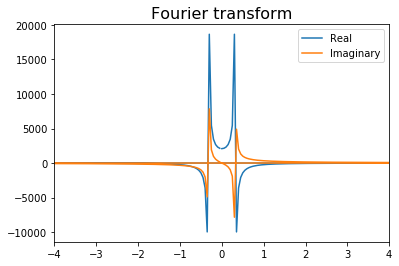

In [8]:
N = 50000
# sample spacing
T = 20/N
x = np.linspace(0,20,N)

y = np.sin(2*x)
        
    # get FFT
transform = np.fft.fft(y)
freq = np.fft.fftfreq(N, d = T)
    
# plot fft & predictions
plt.figure()
plt.plot(freq, transform.real, label = 'Real')
plt.plot(freq, transform.imag, label = 'Imaginary')
plt.title('Fourier transform', fontsize = 16)
plt.xlim(-4,4)
plt.legend()    